In [1]:
!pip install requests beautifulsoup4 pandas matplotlib

Sample Data:
                            Product Name Price (£) Availability
0                   A Light in the Attic   Â£51.77     In stock
1                     Tipping the Velvet   Â£53.74     In stock
2                             Soumission   Â£50.10     In stock
3                          Sharp Objects   Â£47.82     In stock
4  Sapiens: A Brief History of Humankind   Â£54.23     In stock

Data saved as 'clean_books_data.csv'


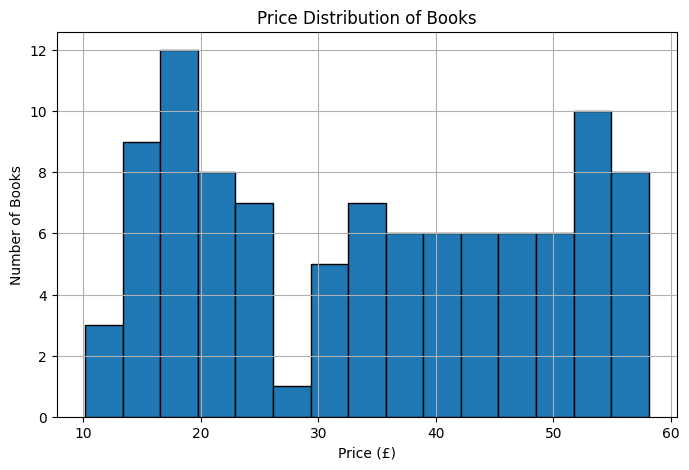

In [7]:
# ===============================
# Step 1: Install Required Libraries
# ===============================
!pip install requests beautifulsoup4 pandas matplotlib
# ===============================
# Step 2: Import Libraries
# ===============================
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

# ===============================
# Step 3: Define Scraper Function
# ===============================
def scrape_books(base_url, pages=3):  # scrape first 3 pages (can increase)
    books = []
    for page in range(1, pages+1):
        url = f"{base_url}catalogue/page-{page}.html"
        response = requests.get(url)
        soup = BeautifulSoup(response.text, "html.parser")

        for item in soup.select(".product_pod"):
            name = item.h3.a["title"]
            price = item.select_one(".price_color").text.strip()
            availability = item.select_one(".availability").text.strip()

            books.append({
                "Product Name": name,
                "Price (£)": price,
                "Availability": availability
            })
    return books

# ===============================
# Step 4: Scrape Data
# ===============================
BASE_URL = "http://books.toscrape.com/"
books_data = scrape_books(BASE_URL, pages=5)  # scrape 5 pages for demo
df = pd.DataFrame(books_data)

print("Sample Data:")
print(df.head())

# ===============================
# Step 5: Data Cleaning
# ===============================
df["Price (£)"] = df["Price (£)"].str.replace("£", "").astype(float)
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

# ===============================
# Step 6: Save Dataset
# ===============================
df.to_csv("clean_books_data.csv", index=False)
print("\nData saved as 'clean_books_data.csv'")

# ===============================
# Step 7: Visualization
# ===============================
plt.figure(figsize=(8,5))
df["Price (£)"].hist(bins=15, edgecolor="black")
plt.xlabel("Price (£)")
plt.ylabel("Number of Books")
plt.title("Price Distribution of Books")
plt.show()
